In [ ]:
!nvidia-smi

Fri Dec 30 09:12:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    54W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install tensorflow==2.3.0
!pip install keras==2.3.1
!pip install tensorflow-text
!pip install contractions
!pip install -q tf-models-official==2.7.0
!pip install tf-hub-nightly
!pip install bert-for-tf2
!pip install pretty-confusion-matrix
!pip install numpy==1.21.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320.5 MB 1.4 kB/s 
     |████████████████████████████████| 20.6 MB 94.6 MB/s 
     |████████████████████████████████| 26.0 MB 1.2 MB/s 
     |████████████████████████████████| 459 kB 59.5 MB/s 
     |████████████████████████████████| 2.9 MB 76.3 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 377 kB 4.7 MB/s 
     |████████████████████████████████| 50 kB 7.3 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 4.7 MB/s 
     |████████████████████████████████| 588.3 MB 22 kB/s 
     |████████████████████████████████| 6.0 MB 29.5 MB/s 
     |████████████████████████████████| 439 kB 90.3 MB/s 
     |████████████████████████████████| 1.7 MB 99.1 MB/s 
     |████████████████████████████████| 17.3 MB 93.0 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Attempting uninstall: tensorflow-estimat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110 kB 4.6 MB/s 
     |████████████████████████████████| 287 kB 29.6 MB/s 
     |████████████████████████████████| 1.8 MB 4.6 MB/s 
     |████████████████████████████████| 238 kB 85.6 MB/s 
     |████████████████████████████████| 1.3 MB 60.5 MB/s 
     |████████████████████████████████| 118 kB 91.2 MB/s 
     |████████████████████████████████| 352 kB 96.4 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 1.1 MB 76.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 101 kB 4.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 176 kB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.7 MB 4.7 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.1
    Uninstalling numpy-1.24.1:
      Successfully uninstalled numpy-1.24.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.4.0 requires scipy>=1.6, but you have scipy 1.4.1 which is incompatible.
pretty-confusion-matrix 0.1.1 requires numpy<2.0.0,>=1.21.4, but you have numpy 1.21.0 which is incompatible.
plotnine 0.8.0 requires scipy>=1.5.0, but you have scipy 1.4.1 which is incompatible.
jaxlib 0.3.25+cuda11.cudnn805 requires scipy>=1.5, but you have scipy 1.4.1 which is incompatible.
jax 0.3.25 requires scipy>=1.5, but you have scipy 1.4.1 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import nltk
import re
import re, string, unicodedata
import contractions
import inflect
from tqdm import tqdm
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.metrics import f1_score
import os
import shutil
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import sys
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization

sys.path.append('models')

tf.get_logger().setLevel('ERROR')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/newdatasetwithcoviddata.csv")
train.head()

,text,label
0,why don t we do it in the road to perdition ad...,0
1,what is the lead time time between diagnosis w...,1
2,covid and ppe some of us will die,1
3,covid antibodies can disappear after months st...,1
4,lab made coronavirus triggers debate the scien...,0


In [ ]:
train = train.sample(120000)


In [ ]:
for i in tqdm(train.index):
  train.label[i] = int(train.label[i])

  0%|          | 0/120000 [00:00<?, ?it/s]<ipython-input-4-75f071f3b7e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.label[i] = int(train.label[i])
100%|██████████| 120000/120000 [00:28<00:00, 4208.56it/s]


In [ ]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

def remove_URL(sample):
  """Remove URLs from a sample string"""
  return re.sub(r"http\S+", "", sample)

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words


def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words


def replace_numbers(words):
  """Replace all interger occurrences in list of tokenized words with textual representation"""
  p = inflect.engine()
  new_words = []
  for word in words:
      if word.isdigit():
          new_word = p.number_to_words(word)
          new_words.append(new_word)
      else:
          new_words.append(word)
  return new_words

In [ ]:
text_preprocess=[]
labels = []
for i in tqdm(train.index):
  text = train['text'][i]
  labels.append(int(train['label'][i]))
  text = remove_URL(text)
  text = replace_contractions(text)
  text = word_tokenize(text)
  text = remove_non_ascii(text)
  text = to_lowercase(text)
  text = remove_punctuation(text)
  text = remove_stopwords(text)
  text = replace_numbers(text)
  text = " ".join(text)
  text_preprocess.append(text)

100%|██████████| 120000/120000 [03:21<00:00, 596.41it/s]


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(text_preprocess, labels, test_size=0.33, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.5, random_state=42)
print(len(x_train))
print(len(x_val))
print(len(x_test))


80400
19800
19800


In [ ]:
with tf.device('/cpu:0'):
  train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
  valid_data = tf.data.Dataset.from_tensor_slices((x_val, y_val))
  test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))


for text, label in train_data.take(0):
  print(text)
  print(label)

In [ ]:
label_list = [0, 1] # Label categories
max_seq_length = 128 # maximum length of (token) input sequences
train_batch_size = 32

# Get BERT layer and tokenizer:
# More details here: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2",
                            trainable=True)
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [ ]:
def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokenizer):
  example = classifier_data_lib.InputExample(guid = None,
                                            text_a = text.numpy(),
                                            text_b = None,
                                            label = label.numpy())
  feature = classifier_data_lib.convert_single_example(0, example, label_list,
                                    max_seq_length, tokenizer)

  return (feature.input_ids, feature.input_mask, feature.segment_ids, feature.label_id)

In [ ]:
def to_feature_map(text, label):
  input_ids, input_mask, segment_ids, label_id = tf.py_function(to_feature, inp=[text, label],
                                Tout=[tf.int32, tf.int32, tf.int32, tf.int32])

  # py_func doesn't set the shape of the returned tensors.
  input_ids.set_shape([max_seq_length])
  input_mask.set_shape([max_seq_length])
  segment_ids.set_shape([max_seq_length])
  label_id.set_shape([])

  x = {
        'input_word_ids': input_ids,
        'input_mask': input_mask,
        'input_type_ids': segment_ids
    }
  return (x, label_id)

In [ ]:
with tf.device('/cpu:0'):
  # train
  train_data = (train_data.map(to_feature_map,
                              num_parallel_calls=tf.data.experimental.AUTOTUNE)
                          #.cache()
                          .shuffle(1000)
                          .batch(32, drop_remainder=True)
                          .prefetch(tf.data.experimental.AUTOTUNE))

  # valid
  valid_data = (valid_data.map(to_feature_map,
                            num_parallel_calls=tf.data.experimental.AUTOTUNE)
                          .batch(32, drop_remainder=True)
                          .prefetch(tf.data.experimental.AUTOTUNE))

In [ ]:
test_data = (test_data.map(to_feature_map,
                            num_parallel_calls=tf.data.experimental.AUTOTUNE)
                          .batch(32, drop_remainder=True)
                          .prefetch(tf.data.experimental.AUTOTUNE))

In [ ]:
train_data.element_spec

({'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [ ]:
valid_data.element_spec


({'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [ ]:
def create_model():
  input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                      name="input_word_ids")
  input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                  name="input_mask")
  input_type_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                  name="input_type_ids")

  pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, input_type_ids])

  drop = tf.keras.layers.Dropout(0.6)(pooled_output)
  output = tf.keras.layers.Dense(1, activation="sigmoid", name="output")(drop)

  model = tf.keras.Model(
    inputs={
        'input_word_ids': input_word_ids,
        'input_mask': input_mask,
        'input_type_ids': input_type_ids
    },
    outputs=output)
  return model

In [ ]:
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                     loss=tf.keras.losses.BinaryCrossentropy(),
                     metrics=[tf.keras.metrics.BinaryAccuracy()])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 128)]        0           []                               
                                                                                                  
 input_type_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 keras_layer_4 (KerasLayer)     [(None, 768),        109482241   ['input_word_ids[0][0]',         
                                 (None, 128, 768)]                'input_mask[0][0]',       

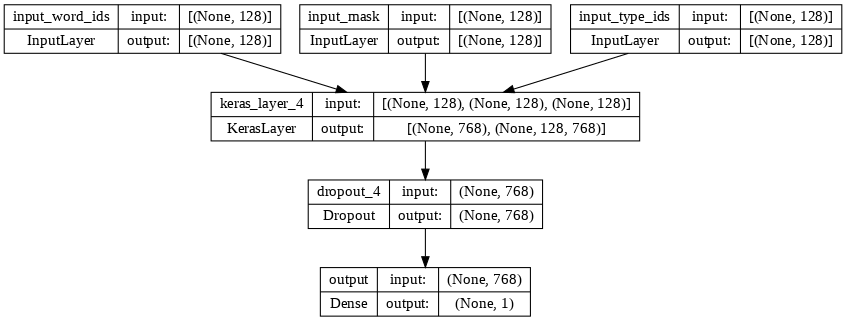

In [ ]:
tf.keras.utils.plot_model(model=model,show_shapes=True,dpi=76)


In [ ]:
epochs=10
history = model.fit(train_data,
                    validation_data=valid_data,
                    epochs=epochs,
                    verbose=1)

Epoch 1/10
2512/2512 [==============================] - 322s 111ms/step - loss: 0.1982 - binary_accuracy: 0.9149 - val_loss: 0.1371 - val_binary_accuracy: 0.9431
Epoch 2/10
2512/2512 [==============================] - 269s 107ms/step - loss: 0.1099 - binary_accuracy: 0.9539 - val_loss: 0.1308 - val_binary_accuracy: 0.9460
Epoch 3/10
2512/2512 [==============================] - 269s 107ms/step - loss: 0.0699 - binary_accuracy: 0.9721 - val_loss: 0.1459 - val_binary_accuracy: 0.9487
Epoch 4/10
2512/2512 [==============================] - 269s 107ms/step - loss: 0.0413 - binary_accuracy: 0.9841 - val_loss: 0.1957 - val_binary_accuracy: 0.9490
Epoch 5/10
2512/2512 [==============================] - 269s 107ms/step - loss: 0.0254 - binary_accuracy: 0.9907 - val_loss: 0.2033 - val_binary_accuracy: 0.9493
Epoch 6/10
2512/2512 [==============================] - 269s 106ms/step - loss: 0.0180 - binary_accuracy: 0.9936 - val_loss: 0.2389 - val_binary_accuracy: 0.9502
Epoch 7/10
2512/2512 [======

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

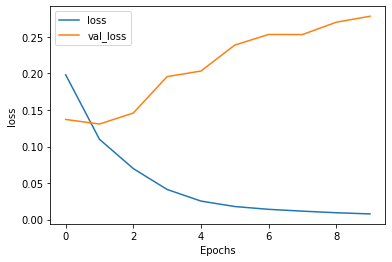

In [ ]:
plot_graphs(history=history, metric='loss')

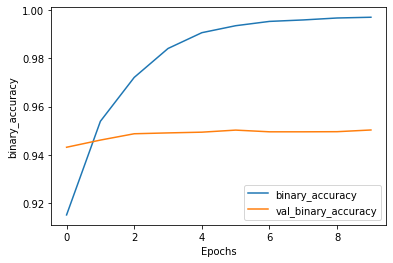

In [ ]:
plot_graphs(history,'binary_accuracy')

In [ ]:
y_pred = model.predict(test_data)

618/618 [==============================] - 23s 35ms/step


In [ ]:
y_pred_class= []
for pred in y_pred:
  if pred >=0.5:
    y_pred_class.append(1)
  else:
    y_pred_class.append(0)

In [ ]:
from sklearn.metrics import classification_report ,cohen_kappa_score ,confusion_matrix ,plot_confusion_matrix

target_names = ['class 0', 'class 1']
print(classification_report(y_test[:19776], y_pred_class, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.86      0.87      0.86      3526
     class 1       0.97      0.97      0.97     16250

    accuracy                           0.95     19776
   macro avg       0.91      0.92      0.92     19776
weighted avg       0.95      0.95      0.95     19776



In [ ]:
print(cohen_kappa_score(y_test[:19776], y_pred_class))

0.8337247769049589


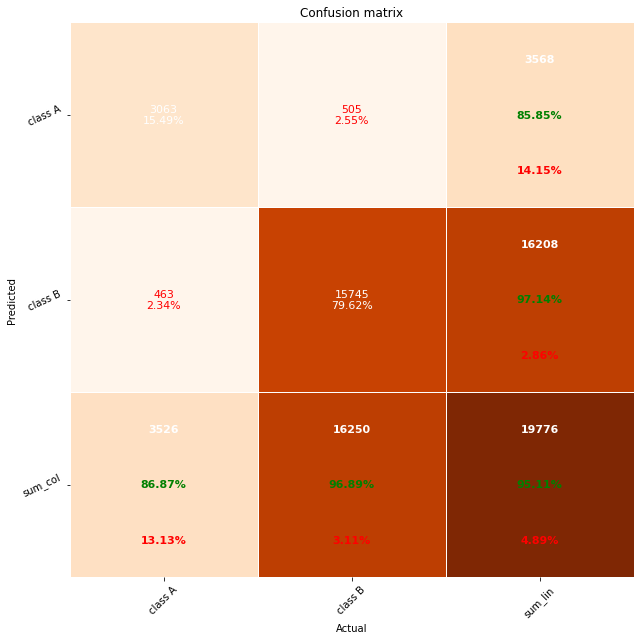

In [ ]:
from pretty_confusion_matrix import pp_matrix_from_data
pp_matrix_from_data(y_test[:19776], y_pred_class)

In [ ]:
data_pred = pd.DataFrame({"true_label":y_test[:19776],
                         "pred_label":y_pred_class

})


In [ ]:
data_pred

,true_label,pred_label
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
19771,1,1
19772,1,1
19773,1,1
19774,1,1


In [ ]:
data_pred.to_csv('output.csv')
data_pred.to_excel('output.xlsx')